In [1]:
import numpy as np
import scipy.stats
import sys
import matplotlib.pyplot as plt

In [3]:
# Import functions directly from github
# Important: note that we use raw.githubusercontent.com, not github.com

# import requests
# url = 'https://raw.githubusercontent.com/florisvb/Nonlinear_and_Data_Driven_Estimation/main/Utility/plot_utility.py'
# r = requests.get(url)

# # Store the file to the colab working directory
# with open('plot_utility.py', 'w') as f:
#     f.write(r.text)


sys.path.append("../Utility")  # add the utility folder to the system path
# import the function we want from that file
from plot_utility import plot_tme

In [4]:
inv = np.linalg.inv

# Generate sample time series data

Same as Linear Least Squares example.

In [6]:
t = np.linspace(0, 3, 600)
x = np.array([[1, 1, 2, -0.4e-4]]).T
H = np.vstack([t, np.sin(t), np.cos(2*t), np.exp(t)]).T
y = H@x

# Two sensors

In [7]:
noise_mean = 0

noise_std_1 = 20
noise_std_2 = 0.5

v = []
v_std = []
noise_i = 1
n_chunks = 0
while len(v)<len(t):
    if noise_i == 1:
        noise_i = 2
        noise_std = noise_std_2
        chunk_size = 50
    else:
        noise_i = 1
        noise_std = noise_std_1
        chunk_size = 150
        
    v_std = np.hstack( (v_std, [noise_std]*chunk_size) ) 
    v = np.hstack( (v, np.random.normal(noise_mean, noise_std, chunk_size)) )
    n_chunks += 1

v_std = v_std[0:len(t)]
v = v[0:len(t)]

v_std = np.column_stack(v_std).T
v = np.column_stack(v).T

y_tilde = y+v

In [8]:
n_chunks

6

# Plotting

<Axes: xlabel='Time', ylabel='y'>

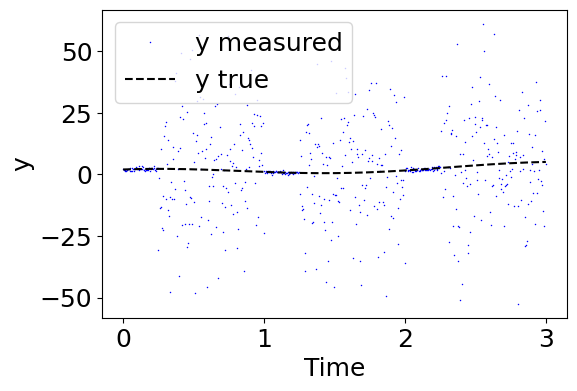

In [9]:
plot_tme(t, y, y_tilde)

# Candidate models

In [10]:
model_1_H = np.vstack([t, np.sin(t), np.cos(2*t)]).T

# Minimum Variance Estimate: Gauss-Markov Theorem

$\mathbf{\hat{x}}=(H^{\top}R^{-1}H)^{-1}H^{\top}R^{-1}\mathbf{\tilde{y}}$

In [11]:
R = np.diag( np.ravel(v_std)**2)
print(R)

[[2.5e-01 0.0e+00 0.0e+00 ... 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 2.5e-01 0.0e+00 ... 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 2.5e-01 ... 0.0e+00 0.0e+00 0.0e+00]
 ...
 [0.0e+00 0.0e+00 0.0e+00 ... 4.0e+02 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 ... 0.0e+00 4.0e+02 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 ... 0.0e+00 0.0e+00 4.0e+02]]


### Model 1

In [12]:
x_1_hat = inv(model_1_H.T@inv(R)@model_1_H)@model_1_H.T@inv(R)@y_tilde

<Axes: xlabel='Time', ylabel='y'>

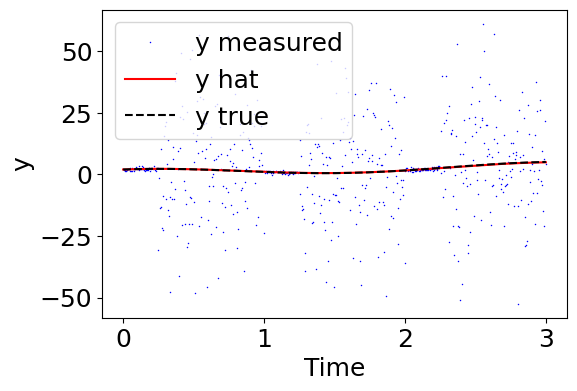

In [13]:
y_1_hat = model_1_H@x_1_hat
plot_tme(t, y, y_tilde, y_1_hat)

In [14]:
x_error = x_1_hat - x[0:3]
print(x_error)

[[-0.05324652]
 [ 0.10490911]
 [-0.00987945]]


# Covariance of x error

In [15]:
P = x_error@x_error.T
print(P)

[[ 2.83519198e-03 -5.58604535e-03  5.26046199e-04]
 [-5.58604535e-03  1.10059223e-02 -1.03644407e-03]
 [ 5.26046199e-04 -1.03644407e-03  9.76034798e-05]]


# Cramer Rao Bound

The diagonal elements of P should (on average) be equal to (or bigger than) the diagonal elements of CRB (provided enough data or replicates). 

In [16]:
CRB = inv(model_1_H.T@inv(R)@model_1_H)
print(CRB)

[[ 7.76558663e-03 -1.41714328e-02  4.55898544e-05]
 [-1.41714328e-02  3.03731901e-02  2.34729457e-03]
 [ 4.55898544e-05  2.34729457e-03  4.57115294e-03]]


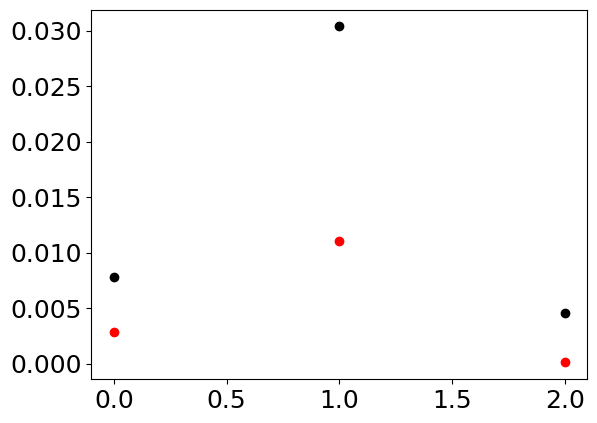

In [103]:
plt.plot(np.diag(P), 'o', color='red')
plt.plot(np.diag(CRB), 'o', color='black')

# Exercise

If you use the wrong R for your estimates (but the true R for CRB), than does your P get much worse than the CRB (worse being larger)?

<Axes: xlabel='Time', ylabel='y'>

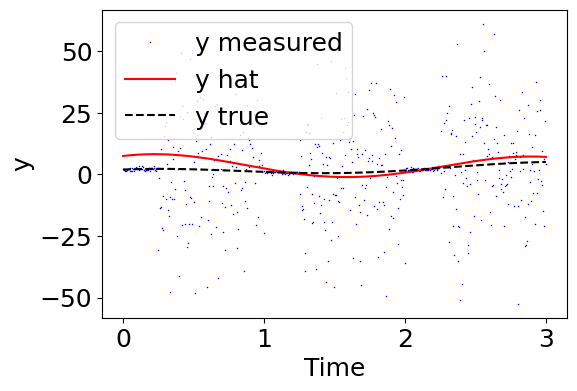

In [75]:
R2 = np.random.rand(len(t)) * np.random.randint(1,1000)
# R2 = np.
R2 = np.eye(len(t)) * R2

x_2_hat = inv(model_1_H.T@inv(R2)@model_1_H)@model_1_H.T@inv(R2)@y_tilde
y_2_hat = model_1_H@x_2_hat
plot_tme(t, y, y_tilde, y_2_hat)

In [76]:
CRB2 = inv(model_1_H.T@inv(R2)@model_1_H)
P2 = (x_2_hat - x[0:3])@(x_2_hat - x[0:3]).T

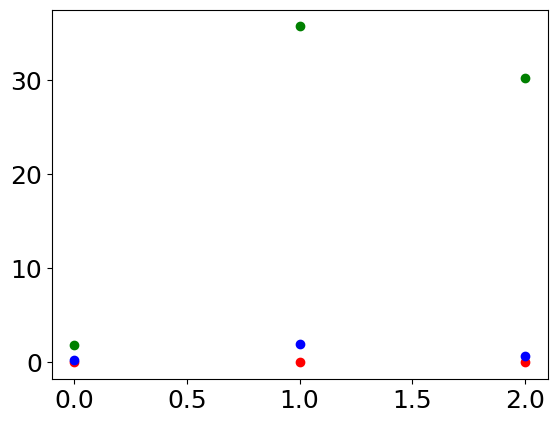

In [77]:
plt.plot(np.diag(P), 'o', color='red')
# plt.plot(np.diag(CRB), 'o', color='black')
plt.plot(np.diag(CRB2), 'o', color='blue')
plt.plot(np.diag(P2), 'o', color='green')

In [97]:





assumed_model = np.vstack([t, np.sin(t), np.cos(2*t)]).T

set_p_best = []
set_p_not_best = []
set_crb_best = []
set_crb_not_best = []


assumed_r = np.eye(len(t)) * np.random.rand(len(t)) * np.random.randint(1,1000)

for i in range(20):
    noise_mean = 0
    noise_std_1 = 20
    noise_std_2 = 0.5
    v = []
    v_std = []
    noise_i = 1
    n_chunks = 0
    while len(v)<len(t):
        if noise_i == 1:
            noise_i = 2
            noise_std = noise_std_2
            chunk_size = 50
        else:
            noise_i = 1
            noise_std = noise_std_1
            chunk_size = 150
        v_std = np.hstack( (v_std, [noise_std]*chunk_size) ) 
        v = np.hstack( (v, np.random.normal(noise_mean, noise_std, chunk_size)) )
        n_chunks += 1
    v_std = v_std[0:len(t)]
    v = v[0:len(t)]
    v_std = np.column_stack(v_std).T
    v = np.column_stack(v).T
    y_tilde = y+v


    bsst_r = np.diag( np.ravel(v_std)**2)    
    x_est_with_best_r = inv(model_1_H.T@inv(R)@model_1_H)@model_1_H.T@inv(R)@y_tilde
    p_best = (x_est_with_best_r - x[0:3])@(x_est_with_best_r - x[0:3]).T
    crb_best = inv(model_1_H.T@inv(R)@model_1_H)
    
    x_est_with_assumed_r = inv(model_1_H.T@inv(assumed_r)@model_1_H)@model_1_H.T@inv(assumed_r)@y_tilde
    p_not_best = (x_est_with_assumed_r - x[0:3])@(x_est_with_assumed_r - x[0:3]).T
    crb_not_best = inv(model_1_H.T@inv(assumed_r)@model_1_H)
    
    set_p_best.append(np.diag(p_best))
    set_p_not_best.append(np.diag(p_not_best))
    set_crb_best.append(np.diag(crb_best))
    set_crb_not_best.append(np.diag(crb_not_best))
    
    
set_p_best = np.array(set_p_best)
set_p_not_best = np.array(set_p_not_best)
set_crb_best = np.array(set_crb_best)
set_crb_not_best = np.array(set_crb_not_best)


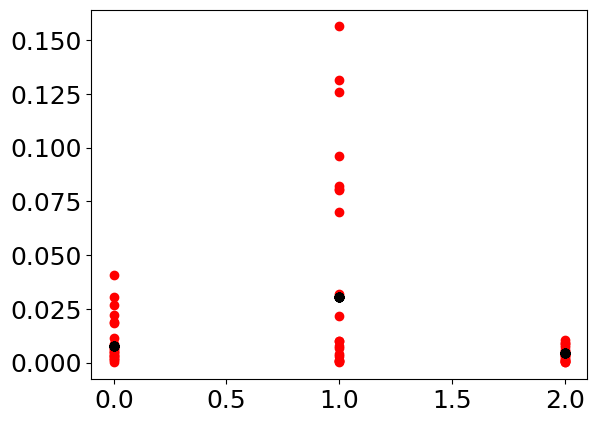

In [102]:
# plt.plot(np.mean(set_p_best, axis=0), 'o', color='red')
# plt.plot(np.mean(set_p_not_best, axis=0), 'o', color='green')
plt.plot(np.arange(3), set_p_best.T, 'o', color='red')
plt.plot(np.arange(3), set_crb_best.T, 'o', color='black')
plt.show()

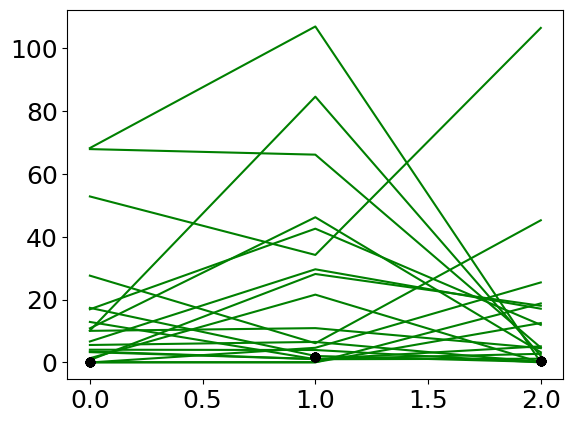

In [101]:
# plt.plot(np.mean(set_crb_best, axis=0), 'o', color='black')
# plt.plot(np.mean(set_crb_not_best, axis=0), 'o', color='blue')

plt.plot(np.arange(3), set_crb_not_best.T, 'o', color='black', zorder=10)   
plt.plot(np.arange(3), set_p_not_best.T, color='green')
plt.show()